In [9]:
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

These are copied from last lecture:

In [17]:
FIGURE_SIZE = (4.5, 3.5)
def plot_prior_posterior(x, prior, posterior, xlim, 
                         prior_label, posterior_label,
                         x_map=None, x_lmse=None):
    
    plt.figure(figsize=FIGURE_SIZE, dpi=80)
    plt.plot(x, prior, lw=2.5, label = prior_label)
    plt.plot(x, posterior, lw=2.5, label = posterior_label)
    if x_map is not None:
        map_index = np.argmin(np.abs(x - x_map))
        posterior_map = posterior[map_index]
        label = f'MAP estimate: {x_map:0.2f}'
        plt.plot([x_map, x_map], [0, posterior_map], '--', lw=2.5, color='black', label=label)
    if x_lmse is not None:
        lmse_index = np.argmin(np.abs(x - x_lmse))
        posterior_lmse = posterior[lmse_index]
        label = f'LMSE estimate: {x_lmse:0.2f}'
        plt.plot([x_lmse, x_lmse], [0, posterior_lmse], '--', lw=1.5, color='red', label=label)
    #plt.legend(bbox_to_anchor=(1.32, 1.02))
    plt.legend()
    ymax = max(max(prior[np.isfinite(prior)]), max(posterior[np.isfinite(posterior)]))
    plt.ylim(-0.3, ymax+0.3)
    plt.xlim(*xlim)
    plt.xlabel('$x$')
    plt.title(r'Prior $p(\theta)$ and posterior given observed data $x$: $p(\theta|x)$');
    
    
def plot_beta_prior_and_posterior(alpha, beta, pos_obs, neg_obs, show_map=False, show_lmse=False):   
    x = np.linspace(0, 1, 100)
    prior = stats.beta.pdf(x, alpha, beta)
    
    alpha_new = alpha + pos_obs
    beta_new = beta + neg_obs
    posterior = stats.beta.pdf(x, alpha_new, beta_new)
    
    # You never have to memorize these: when making this notebook,
    # I found them on the wikipedia page for the Beta distribution:
    # https://en.wikipedia.org/wiki/Beta_distribution

    if show_lmse:
        x_lmse = (alpha_new)/(alpha_new + beta_new)
    else:
        x_lmse = None
        
    if show_map:
        x_map = (alpha_new - 1) / (alpha_new + beta_new - 2)
    else:
        x_map = None
    plot_prior_posterior(x, prior, posterior, (-0.02, 1.02),
                         prior_label=f'Prior: Beta({alpha}, {beta})',
                         posterior_label=f'Posterior: Beta({alpha_new}, {beta_new})',
                         x_map=x_map, x_lmse=x_lmse)
    
# You don't need to understand how this function is implemented.

def plot_gaussian_prior_and_posterior(μ_0, σ_0, xs, σ, range_in_σs=3.5, show_map=False, show_lmse=False):
    """
    Plots prior and posterior Normaly distribution
    
    Args:
        μ_0, σ_0: parameters (mean, SD) of the prior distribution
        xs: list or array of observations
        σ: SD of the likelihood
        range_in_σs: how many SDs away from the mean to show on the plot
        show_map: whether or not to show the MAP estimate as a vertical line
        show_lmse: whether or not to show the LMSE/MMSE estimate as a vertical line
    """
    n = len(xs)
    posterior_σ = 1/np.sqrt(1/(σ_0**2) + n/(σ**2))
    posterior_mean = (posterior_σ**2) * (μ_0/(σ_0**2) + np.sum(xs)/(σ**2))
    
    # Compute range for plot
    posterior_min = posterior_mean - (range_in_σs * posterior_σ)
    posterior_max = posterior_mean + (range_in_σs * posterior_σ)
    prior_min = μ_0 - (range_in_σs * σ)
    prior_max = μ_0 + (range_in_σs * σ)
    
    xmin = min(posterior_min, prior_min)
    xmax = max(posterior_max, prior_max)
    x = np.linspace(xmin, xmax, 100)
    if show_lmse:
        x_lmse = posterior_mean
    else:
        x_lmse = None
        
    if show_map:
        x_map = posterior_mean
    else:
        x_map = None

    
    prior = stats.norm.pdf(x, μ_0, σ_0)
    posterior = stats.norm.pdf(x, posterior_mean, posterior_σ)
    
    
    plot_prior_posterior(x, prior, posterior, (xmin, xmax), 'Prior', 'Posterior',
                         x_map=x_map, x_lmse=x_lmse)


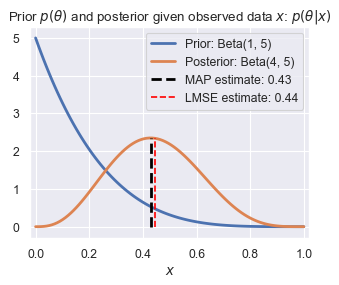

In [23]:
# Microwave A: 3 positive reviews, 0 negative reviews
plot_beta_prior_and_posterior(1, 5, 3, 0, show_map=True, show_lmse=True)


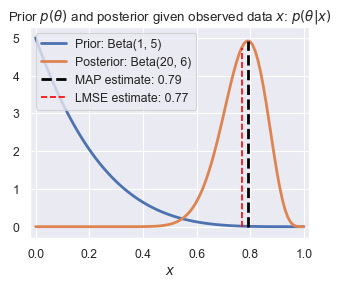

In [25]:
# Microwave B: 19 positive reviews, 1 negative reviews
plot_beta_prior_and_posterior(1, 5, 19, 1, show_map=True, show_lmse=True)


(61.0, 78.0)

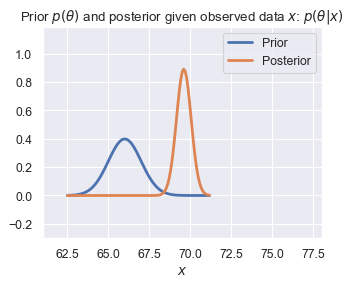

In [20]:
plot_gaussian_prior_and_posterior(5*12 + 6, 1, [6*12+0, 6*12+1, 5*12+9, 5*12+8], 1)
plt.xlim([61, 78])

(61.0, 78.0)

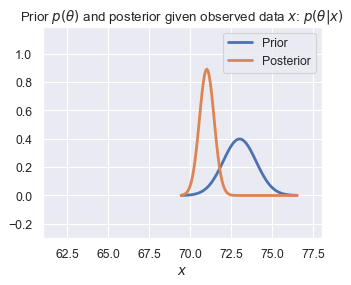

In [21]:
plot_gaussian_prior_and_posterior(6*12 + 1, 1, [6*12+0, 6*12+1, 5*12+9, 5*12+8], 1)
plt.xlim([61, 78])

In [2]:
planets = pd.read_csv('exoplanets.csv')
planets.head()

,name,orbital_period,mass,radius,star_temperature,density
0,2MASS J21402931+1625183 A b,7336.500000,6657.910000,10.312188,2300.0,NaN
1,55 Cnc e,0.736539,8.078476,1.905513,5196.0,6.40
2,BD+20 594 b,41.685500,16.299962,2.230571,5766.0,7.89
3,CoRoT-1 b,1.508956,327.334000,16.701261,5950.0,0.38
4,CoRoT-10 b,13.240600,873.950000,10.872633,5075.0,3.70


<AxesSubplot:xlabel='radius', ylabel='Density'>

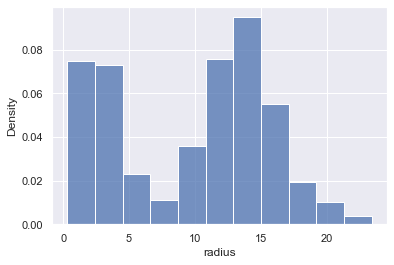

In [5]:
sns.histplot(data=planets, x='radius', stat='density')

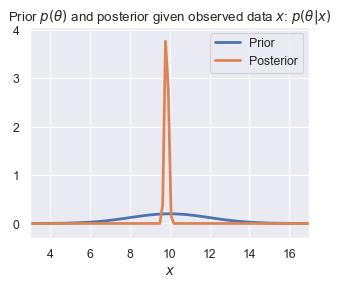

In [12]:
plot_gaussian_prior_and_posterior(10, 2, planets['radius'], 2)

(-0.5, 24.0)

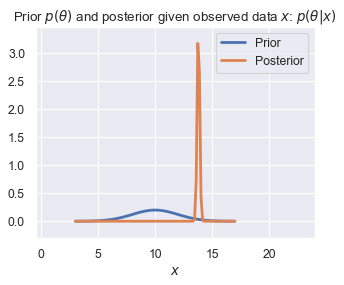

In [27]:
plot_gaussian_prior_and_posterior(10, 2, planets.loc[planets['radius'] > 7.5, 'radius'], 2)
plt.xlim([-0.5, 24])